### Import Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Load and Prepare the Data

In [2]:
data = pd.read_csv("C:/Users/muge/Dropbox/GMU/Portfolio/AIT 580/Movies/cleaned_movies_data.csv")

In [3]:
# Select relevant columns
features = ['MPAA Rating', 'Profit', 'ROI', 'Worldwide Gross']

# Drop rows with missing values in the selected features
data = data.dropna(subset=features)

# Display the first few rows of the dataset
print(data[features].head())

  MPAA Rating     Profit        ROI  Worldwide Gross
0           r -7853917.0 -98.173963         146083.0
1           r  -289124.0 -96.374667          10876.0
2     unknown   -46866.0 -18.746400         203134.0
3     unknown    73615.0  24.538333         373615.0
4           r    87521.0   8.752100        1087521.0


#### 1. Compare Average Performance Metrics Across MPAA Ratings

In [4]:
# Group by MPAA Rating and calculate mean values
mpaa_performance = data.groupby('MPAA Rating')[['Profit', 'ROI', 'Worldwide Gross']].mean().reset_index()

# Display the summary
print(mpaa_performance)

  MPAA Rating        Profit          ROI  Worldwide Gross
0           g  3.903621e+07   337.512659     6.385665e+07
1       nc-17  1.342983e+07  1711.502935     2.248511e+07
2          pg  1.924197e+07   321.977306     4.655966e+07
3       pg-13  1.785120e+07   200.594960     4.575315e+07
4           r  1.332834e+07   267.230953     3.359999e+07
5     unknown  1.734595e+07  1079.497360     2.830462e+07


G-Rated Movies:
* Have the highest average profit (3.9e+07) and highest average worldwide gross (6.38e+07).
* Have a relatively high average ROI (337).

NC-17 Rated Movies:
* Have a relatively low average profit (1.34e+07) and low average worldwide gross (2.24e+07).
* Have the highest average ROI (1711), suggesting that while they may not generate as much revenue, they are often very profitable relative to their budgets.

PG-Rated Movies:
* Have the second highest average profit (1.92e+07) and second highest average worldwide gross (4.65e+07).
* Have a relatively high average ROI (321).

PG-13 Rated Movies:
* Have a mean profit (1.78e+07) and mean worldwide gross (4.57e+07) very close to PG rated movies.
* Have the lowest average ROI (200) among the known ratings.

R-Rated Movies:
* Have the lowest average profit (1.33e+07) and lowest average worldwide gross (3.35e+07) among the known ratings.
* Have a moderate average ROI (267).

Unknown MPAA Rating Movies:
* Have a mean profit (1.73e+07) and mean worldwide gross (2.83e+07) in the middle range.
* Have a very high average ROI (1079), second only to NC-17 movies. This could be due to a variety of factors, including low-budget independent films.

Analysis:
* G-Rated Success: G-rated movies appear to be the most financially successful on average, possibly due to their broad appeal to families.
* NC-17 Profitability: NC-17 movies, despite lower overall revenue, can be very profitable on average, likely due to lower production and marketing costs.
* PG and PG-13 Appeal: PG and PG-13 movies are consistently high performers in terms of profit and worldwide gross.
* R-Rated Challenges: R-rated movies tend to have lower average profits and worldwide gross, likely due to a more limited audience.
* Unknown Rating Variability: Movies with unknown MPAA ratings show a wide range of performance, with some achieving high ROI.

Possible Next Steps:
* Statistical Significance: Perform statistical tests (e.g., ANOVA) to determine if the differences in mean values across MPAA ratings are statistically significant.
* Sample Size: Consider the sample size for each MPAA rating. Some ratings might have fewer movies, which could affect the reliability of the mean values.
* Genre Analysis: Analyze if there are any genre trends within each MPAA rating category.
* Budget Analysis: Investigate the average budgets for each rating to better understand the relationship between budget, rating, and financial performance.
* Visualizations: Create visualizations (e.g., bar charts, box plots) to compare the distributions of profit, ROI, and worldwide gross across MPAA ratings.

#### 2. Visualize the Distribution of Performance Metrics

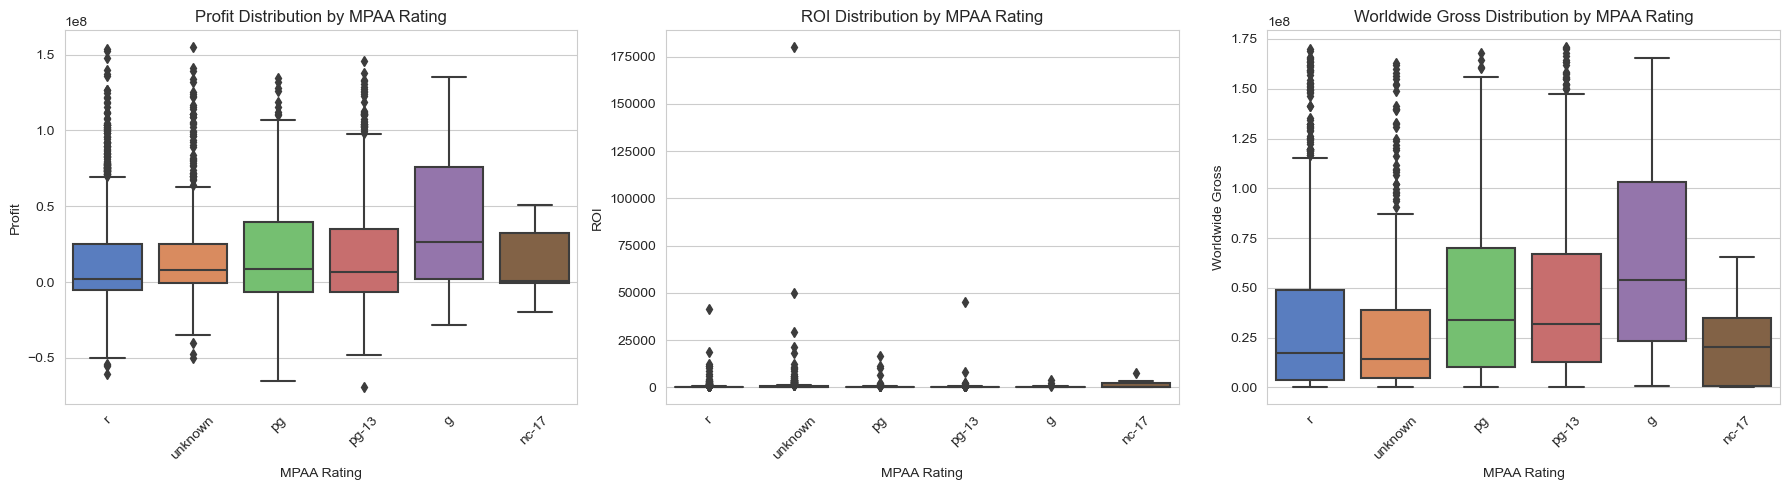

In [5]:
# Set Seaborn style
sns.set_style("whitegrid")

# Create a figure with subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Box plots for each metric
sns.boxplot(x='MPAA Rating', y='Profit', data=data, ax=axes[0], palette="muted")
axes[0].set_title('Profit Distribution by MPAA Rating')

sns.boxplot(x='MPAA Rating', y='ROI', data=data, ax=axes[1], palette="muted")
axes[1].set_title('ROI Distribution by MPAA Rating')

sns.boxplot(x='MPAA Rating', y='Worldwide Gross', data=data, ax=axes[2], palette="muted")
axes[2].set_title('Worldwide Gross Distribution by MPAA Rating')

# Rotate x-axis labels for better readability
for ax in axes:
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

plt.tight_layout()
plt.show()

##### Profit Distribution by MPAA Rating (Left Chart):
* G-rated movies show the highest median profit and a wide range of positive profits.
* PG and PG-13 also show relatively high median profits.
* R-rated and Unknown ratings have lower median profits and a wider spread of negative profits.
* NC-17 shows a moderate median profit and a narrower range of profits.

* Outliers: All categories have outliers, indicating some movies that performed exceptionally well or poorly.

Key Takeaway: 
* G-rated movies tend to be the most profitable on average, while R-rated movies tend to have lower profits and higher risk of losses.

##### ROI Distribution by MPAA Rating (Middle Chart):
* NC-17 shows the highest median ROI, although it has a narrow range.
* Unknown rating also shows a high median ROI but with more variability.
* G-rated shows a moderate median ROI.
* R, PG, and PG-13 show relatively low median ROIs.
* Outliers: There are some outliers in the lower ROI categories (R, PG, PG-13), indicating a few movies with exceptionally high ROIs.

Key Takeaway: 
* NC-17 movies, despite lower overall revenue, tend to have the highest returns relative to their budgets.

##### Worldwide Gross Distribution by MPAA Rating (Right Chart):
* G-rated movies show the highest median worldwide gross and a wide range of high revenues.
* PG and PG-13 also show relatively high median worldwide grosses.
* R-rated and Unknown ratings have lower median worldwide grosses and a wider spread.
* NC-17 shows a moderate median worldwide gross.
* Outliers: All categories have outliers, indicating some movies that achieved exceptionally high revenues.

Key Takeaway: 
* G-rated movies tend to generate the highest worldwide revenues, while R-rated movies tend to generate lower revenues.

##### Interpretation:
* G-Rated Success: G-rated movies seem to be the most financially successful overall, with high profits and high worldwide gross.
* NC-17 Profitability: NC-17 movies, despite lower overall revenue, can be very profitable relative to their budgets (high ROI).
* PG and PG-13 Appeal: PG and PG-13 movies are consistently high performers in terms of profit and worldwide gross.
* R-Rated Challenges: R-rated movies tend to have lower average profits and worldwide gross, likely due to a more limited audience.
* Unknown Rating Variability: Movies with unknown MPAA ratings show a wide range of performance, with some achieving high ROI.

Important Considerations:
* Sample Size: Consider the sample size for each MPAA rating. Some ratings might have fewer movies, which could affect the reliability of the distributions.
* Genre Analysis: Analyze if there are any genre trends within each MPAA rating category.
* Budget Analysis: Investigate the average budgets for each rating to better understand the relationship between budget, rating, and financial performance.
* Statistical Significance: Perform statistical tests (e.g., ANOVA) to determine if the differences in distributions across MPAA ratings are statistically significant.

#### 3. Violin Plots for More Insight

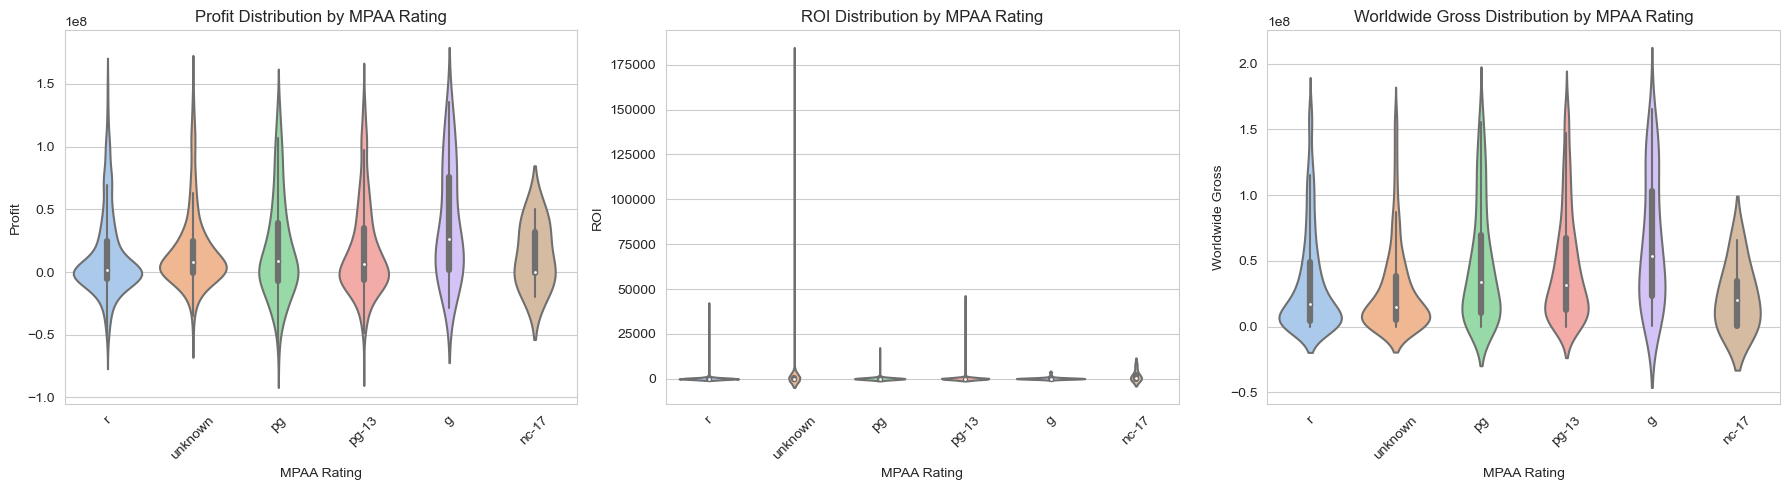

In [6]:
# Create violin plots
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

sns.violinplot(x='MPAA Rating', y='Profit', data=data, ax=axes[0], palette="pastel")
axes[0].set_title('Profit Distribution by MPAA Rating')

sns.violinplot(x='MPAA Rating', y='ROI', data=data, ax=axes[1], palette="pastel")
axes[1].set_title('ROI Distribution by MPAA Rating')

sns.violinplot(x='MPAA Rating', y='Worldwide Gross', data=data, ax=axes[2], palette="pastel")
axes[2].set_title('Worldwide Gross Distribution by MPAA Rating')

# Rotate x-axis labels
for ax in axes:
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

plt.tight_layout()
plt.show()

##### Profit Distribution by MPAA Rating (Left Chart):
* G-rated movies show the highest spread and a clear peak towards higher profits, indicating a tendency for higher profits. The violin shape also suggests a wider range of high-profit movies.
* PG and PG-13 show similar distributions with a slight skew towards higher profits, indicating a tendency for moderate to high profits.
* R-rated and Unknown ratings show flatter violins, suggesting a wider spread of profits including more losses.
* NC-17 shows a more concentrated violin shape, indicating a narrower range of profits.
* Width: The width of the violin represents the density of data points at that level. Wider sections indicate more data points at that profit level.

Key Takeaway: 
* G-rated movies tend to be the most profitable on average, with a strong skew towards higher profits, while R-rated movies tend to have a wider spread of profits including more losses.

##### ROI Distribution by MPAA Rating (Middle Chart):
* NC-17 shows a very narrow violin shape with a high peak close to zero, suggesting a very concentrated ROI with a high median but low variability.
* Unknown rating shows a broader violin shape, indicating more variability in ROI, but still with a skew towards higher values.
* G-rated shows a moderate spread with a slight skew towards higher ROI.
* R, PG, and PG-13 show very narrow violin shapes close to zero, indicating very low ROIs for most movies in these categories.
* Thickness: The thickness of the violin indicates the density of data points at that ROI level. Thicker sections indicate a higher concentration of movies at that ROI.

Key Takeaway: 
* NC-17 movies tend to have the highest median ROI, but with very low variability, suggesting consistent returns. R, PG, and PG-13 movies generally have very low ROIs.

##### Worldwide Gross Distribution by MPAA Rating (Right Chart):
* G-rated movies show the widest spread and a clear peak towards higher worldwide gross, indicating a tendency for higher revenues.
* PG and PG-13 show similar distributions with a slight skew towards higher revenues, indicating a tendency for moderate to high revenues.
* R-rated and Unknown ratings show flatter violins, suggesting a wider spread of revenues including more lower-grossing movies.
* NC-17 shows a more concentrated violin shape, indicating a narrower range of revenues.
* Shape: The shape of the violin indicates the distribution of data points at different revenue levels. Skinnier sections indicate fewer movies at that revenue level.

Key Takeaway: 
* G-rated movies tend to generate the highest worldwide revenues, while R-rated movies tend to generate lower revenues.

##### Overall Interpretation:
* G-Rated Success: G-rated movies tend to be the most financially successful overall, with high profits and high worldwide gross.
* NC-17 Profitability: NC-17 movies, despite lower overall revenue, can be very profitable relative to their budgets (high ROI).
* PG and PG-13 Appeal: PG and PG-13 movies are consistently high performers in terms of profit and worldwide gross.
* R-Rated Challenges: R-rated movies tend to have lower average profits and worldwide gross, likely due to a more limited audience.
* Unknown Rating Variability: Movies with unknown MPAA ratings show a wide range of performance, with some achieving high ROI.

Advantages of Violin Plots:
* Distribution Shape: Violin plots show the distribution shape, which box plots do not. This helps understand the data's density and skewness.
* Density Estimation: Violin plots provide a kernel density estimation, which gives a better sense of data concentration and spread.

Important Considerations:
* Sample Size: Consider the sample size for each MPAA rating. Some ratings might have fewer movies, which could affect the reliability of the distributions.
* Genre Analysis: Analyze if there are any genre trends within each MPAA rating category.
* Budget Analysis: Investigate the average budgets for each rating to better understand the relationship between budget, rating, and financial performance.
* Statistical Significance: Perform statistical tests (e.g., ANOVA) to determine if the differences in distributions across MPAA ratings are statistically significant.